In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ltrm_fish_data.csv", low_memory=False)

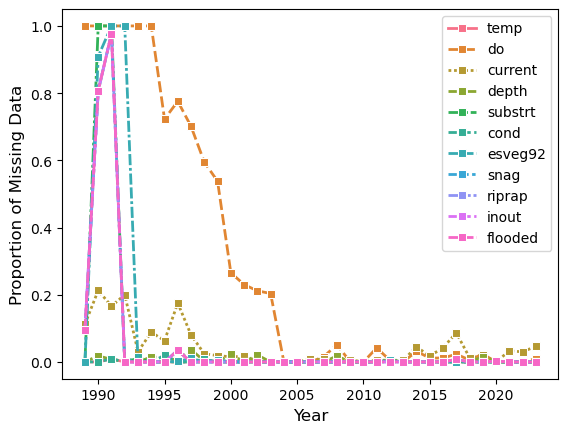

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[df['fishcode'].notna()].reset_index(drop=True)

df['year'] = pd.to_datetime(df['sdate']).dt.year
yearly_missing_df = df.groupby('year')[['temp', 'do', 'current', 'depth', 'substrt','cond','esveg92', 'snag', 'riprap', 'inout','flooded']].apply(lambda x: x.isna().mean())

fig, ax = plt.subplots(1, 1)
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

In [4]:
df = df[(df['year'] >= 2004) & (df[['temp', 'do', 'current', 'depth', 'substrt','cond','esveg92', 'snag', 'riprap', 'inout','flooded']].isna().sum(axis=1) == 0)].reset_index(drop=True)

In [5]:
df = df.groupby(['utm_e', 'utm_n', 'year', 'period', 'pool']).agg(
    median_temp=('temp', 'median'),
    median_do=('do', 'median'),
    median_current=('current', 'median'),
    median_depth=('depth', 'median'),
    median_substrt=('substrt', 'median'),
    median_esveg92=('esveg92', 'median'),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    fish_codes=('fishcode', lambda x: list(x))
)

unique_fish = set([item for sublist in df['fish_codes'] for item in sublist])
expanded_df = pd.DataFrame({fish: df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
df = pd.concat([df, expanded_df], axis=1)
df.drop(columns = ['fish_codes'], inplace=True)

fish_df = df.drop(columns=['median_substrt', 'median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present' ])
df['richness'] = fish_df.sum(axis=1)

pd.set_option('display.max_columns', None)
df.head(50)

median_temp  median_do  median_current  \
utm_e  utm_n   year period pool                                           
532479 4938958 2014 1      04           24.9        6.9            0.41   
536879 4935808 2004 1      04           20.6        6.9            0.08   
536929 4935758 2016 1      04           24.8        6.0            0.02   
536979 4935758 2023 1      04           28.1       12.8            0.06   
537129 4936458 2004 3      04            8.5       11.3            0.00   
537329 4935858 2010 2      04           25.3        7.2            0.04   
537379 4935758 2012 1      04           26.7        5.8            0.02   
       4935958 2004 2      04           21.7        7.3            0.03   
538779 4934908 2015 3      04           19.4       14.0            0.19   
538829 4936108 2019 2      04           21.5        9.2            0.24   
538879 4934908 2019 3      04           24.1        7.3            0.06   
538929 4934858 2016 1      04           27.3        5.4            0.02   
539079 4936058 2023 2      04           26.6        7.0            0.14   
       4937008 2004 2      04           19.9        5.1            0.05   
539179 4935008 2015 2      04           29.6        7.1            0.02   
539229 4936008 2018 3      04            8.9       10.3            0.31   
539329 4936008 2014 2      04           26.6        8.0            0.06   
539379 4936008 2016 2      04           26.7        8.0            0.11   
539429 4935758 2019 3      04           22.3        8.3            0.00   
539579 4936158 2005 3      04           14.4        6.8            0.09   
       4936908 2023 3      04           12.9       10.0            0.00   
539629 4935758 2010 3      04           16.6        7.7            0.05   
       4935958 2009 3      04           13.3        8.8            0.16   
               2012 3      04           18.7       12.4            0.01   
539679 4934608 2017 2      04           21.9       10.6            0.00   
       4936658 2011 3      04            9.5       15.7            0.00   
539729 4935958 2022 2      04           22.7        6.9            0.02   
539879 4935308 2010 1      04           23.7        5.7            0.01   
539929 4934558 2021 1      04           24.8        7.3            0.00   
540429 4935308 2022 3      04            8.9       10.5            0.02   
540479 4934508 2022 2      04           24.8       12.8            0.00   
       4936658 2006 3      04            9.2       11.9            0.09   
       4936908 2006 2      04           27.3       15.3            0.00   
540529 4934558 2012 2      04           25.8        7.0            0.01   
       4934608 2005 2      04           24.7        6.0            0.00   
       4936908 2005 3      04           15.6       10.7            0.00   
               2006 3      04            7.9       12.3            0.00   
540579 4936858 2018 2      04           20.7       14.1            0.02   
540629 4935658 2016 2      04           27.7       10.0            0.04   
540679 4934658 2023 2      04           26.4        5.9            0.02   
       4935408 2005 3      04           14.0        7.6            0.02   
       4936908 2022 3      04           10.4       13.6            0.01   
540829 4935408 2009 3      04            8.6       11.7            0.00   
       4936108 2006 2      04           27.2        7.3            0.00   
540929 4934758 2021 3      04           12.4        8.5            0.00   
541029 4934758 2017 2      04           22.3       13.2            0.01   
       4934858 2023 2      04           26.8        7.1            0.02   
       4935758 2022 2      04           22.7        7.2            0.09   
541079 4936158 2011 2      04           25.3       10.4            0.02   
541129 4935808 2005 2      04           24.6        7.2            0.05   

                                 median_depth  median_substrt  median_esveg92  \
utm_e  utm_n   year period pool                    

In [6]:
# df['median_esveg92'].value_counts()

Text(0, 0.5, 'Density')

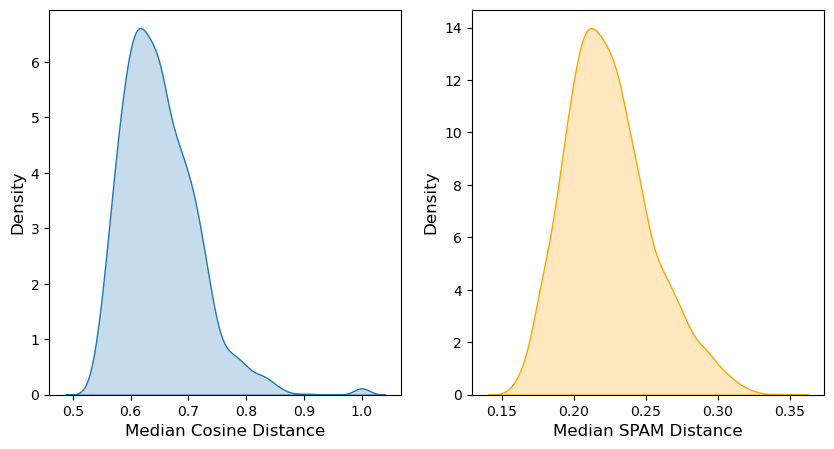

In [7]:
from scipy.spatial.distance import pdist, squareform

def spam_distance(x, y, alpha=2, beta=3):
    a = sum((x == 1) & (y == 1))
    b = sum((x == 0) & (y == 0))
    c = sum((x == 1) & (y == 0))
    d = sum((x == 0) & (y == 1))
    return alpha * (c + d) / (beta*a + b + alpha * (c + d))

dist_matrix_cosine = pdist(1*fish_df, metric='cosine')
dist_matrix_spam = pdist(1*fish_df, metric=spam_distance)

dist_df_cosine = pd.DataFrame(squareform(dist_matrix_cosine))
dist_df_spam = pd.DataFrame(squareform(dist_matrix_spam))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(dist_df_cosine.median(axis=0), clip=(0, None), ax = ax[0], fill=True)
sns.kdeplot(dist_df_spam.median(axis=0), clip=(0, None), ax = ax[1], fill=True, color="orange")
ax[0].set_xlabel("Median Cosine Distance", fontsize = 12)
ax[0].set_ylabel("Density", fontsize = 12)
ax[1].set_xlabel("Median SPAM Distance", fontsize = 12)
ax[1].set_ylabel("Density", fontsize = 12)

In [8]:
fish_cosine_df = fish_df[(dist_df_cosine.median(axis=0) <= 0.85).values].copy()
fish_spam_df = fish_df.copy()

cosine_df = df[(dist_df_cosine.median(axis=0) <= 0.85).values].copy()
spam_df = df.copy()

dist_matrix_cosine = pdist(1*fish_cosine_df, metric='cosine')
dist_matrix_spam = pdist(1*fish_spam_df, metric=spam_distance)

dist_df_cosine = pd.DataFrame(squareform(dist_matrix_cosine))
dist_df_spam = pd.DataFrame(squareform(dist_matrix_spam))

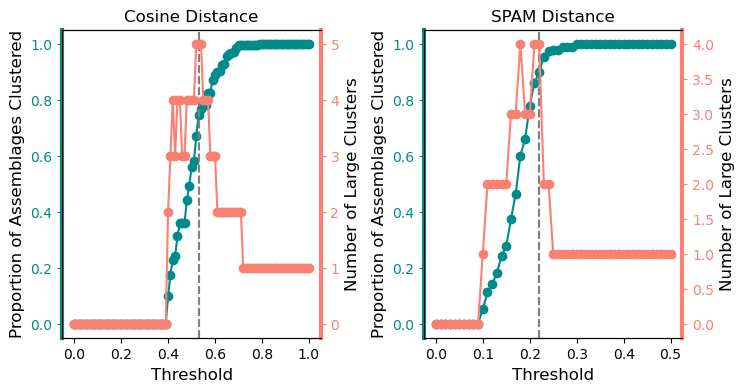

In [9]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

linked_cosine = linkage(dist_matrix_cosine, method='average')
linked_spam = linkage(dist_matrix_spam, method='average')

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for n, thresholds in enumerate([np.linspace(0, 1, 101), np.linspace(0, 0.5, 51)]):
    ratio_data_clustered = []
    num_big_clusters = []

    for t in thresholds:
        if n == 0:
            clusters = fcluster(linked_cosine, t, criterion='distance')
        else:
            clusters = fcluster(linked_spam, t, criterion='distance')

        cluster_sizes = np.bincount(clusters)
        large_clusters = cluster_sizes[cluster_sizes >= 100]
        num_big_clusters.append(len(large_clusters))

        if n == 0:
            ratio_data_clustered.append(large_clusters.sum() / len(fish_cosine_df))
        else:
            ratio_data_clustered.append(large_clusters.sum() / len(fish_spam_df))

        #if num_big_clusters[-1] > 4:
        #    print(ratio_data_clustered[-1])
        #    print(t, num_big_clusters[-1])

    ax[n].plot(thresholds, ratio_data_clustered, color='darkcyan', marker='o', linestyle='-')
    ax2 = ax[n].twinx()
    ax2.plot(thresholds, num_big_clusters, color='salmon', marker='o', linestyle='-')

    ax[n].set_xlabel("Threshold", fontsize=12)
    ax[n].set_ylabel("Proportion of Assemblages Clustered", fontsize=12)
    ax[n].spines['left'].set_linewidth(3) 
    ax[n].tick_params(axis='y', labelcolor='darkcyan')
    ax[n].spines['left'].set_edgecolor('darkcyan')
    ax[n].yaxis.set_tick_params(left=True, color='darkcyan') 

    ax2.spines['right'].set_linewidth(3) 
    ax2.tick_params(axis='y', labelcolor='salmon')
    ax2.spines['right'].set_edgecolor('salmon')
    ax2.yaxis.set_tick_params(right=True, color='salmon')
    ax2.set_ylabel("Number of Large Clusters", fontsize=12)

    ax[0].axvline(0.53, color='grey', linestyle='--')
    ax[1].axvline(0.22, color='grey', linestyle='--')

    fig.subplots_adjust(wspace=0.4)
    ax[0].set_title("Cosine Distance")
    ax[1].set_title("SPAM Distance")


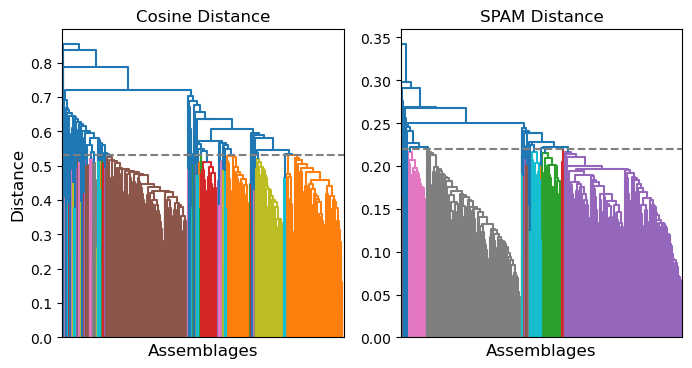

In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
dendrogram(
    linked_cosine,
    color_threshold = 0.53,
    count_sort=True,
    no_labels=True,
    ax=ax[0]
)

dendrogram(
    linked_spam,
    color_threshold = 0.22,
    count_sort=True,
    no_labels=True,
    ax=ax[1]
)

ax[0].axhline(y=0.53, color='grey', linestyle='--')
ax[1].axhline(y=0.22, color='grey', linestyle='--')

ax[0].set_xlabel('Assemblages', fontsize = 12)
ax[1].set_xlabel('Assemblages', fontsize = 12)
ax[0].set_ylabel("Distance", fontsize = 12)

ax[0].set_title("Cosine Distance")
ax[1].set_title("SPAM Distance");

In [11]:
from scipy.cluster.hierarchy import fcluster

# cosine
cosine_cluster_labels = fcluster(linked_cosine, t=0.53, criterion='distance')
cosine_df['cluster'] = cosine_cluster_labels
fish_cosine_df['cluster'] = cosine_cluster_labels

cluster_sizes = cosine_df['cluster'].value_counts()
big_clusters = cluster_sizes[cluster_sizes >= 100].index

mask = cosine_df['cluster'].isin(big_clusters).values
cosine_df = cosine_df[mask].reset_index(drop=True)
fish_cosine_df = fish_cosine_df[mask].reset_index(drop=True)

mapping = dict(zip(big_clusters, range(1, len(big_clusters) + 1)))
cosine_df['cluster'] = cosine_df['cluster'].replace(mapping)
fish_cosine_df['cluster'] = fish_cosine_df['cluster'].replace(mapping)

# spam
spam_cluster_labels = fcluster(linked_spam, t=0.22, criterion='distance')
spam_df['cluster'] = spam_cluster_labels
fish_spam_df['cluster'] = spam_cluster_labels

cluster_sizes = spam_df['cluster'].value_counts()
big_clusters = cluster_sizes[cluster_sizes >= 100].index

mask = spam_df['cluster'].isin(big_clusters).values
spam_df = spam_df[mask].reset_index(drop=True)
fish_spam_df = fish_spam_df[mask].reset_index(drop=True)

mapping = dict(zip(big_clusters, range(1, len(big_clusters) + 1)))
spam_df['cluster'] = spam_df['cluster'].replace(mapping)
fish_spam_df['cluster'] = fish_spam_df['cluster'].replace(mapping)

Text(0.5, 0, 'SPAM Clusters')

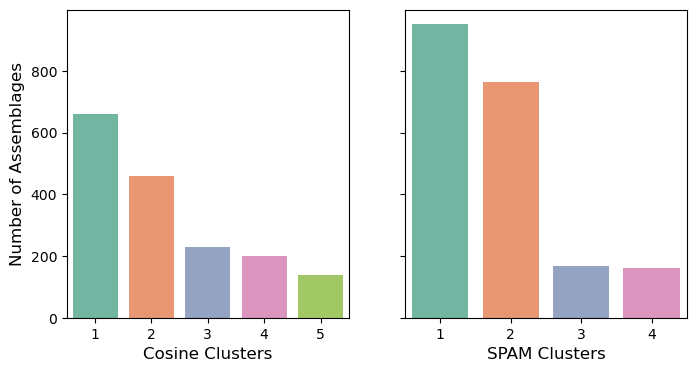

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

sns.countplot(x='cluster', data=fish_cosine_df, hue='cluster', palette="Set2", legend=False, ax = ax[0])
sns.countplot(x='cluster', data=fish_spam_df, hue='cluster', palette="Set2", legend=False)

ax[0].set_ylabel("Number of Assemblages", fontsize=12)
ax[0].set_xlabel("Cosine Clusters", fontsize=12)
ax[1].set_xlabel("SPAM Clusters", fontsize=12)

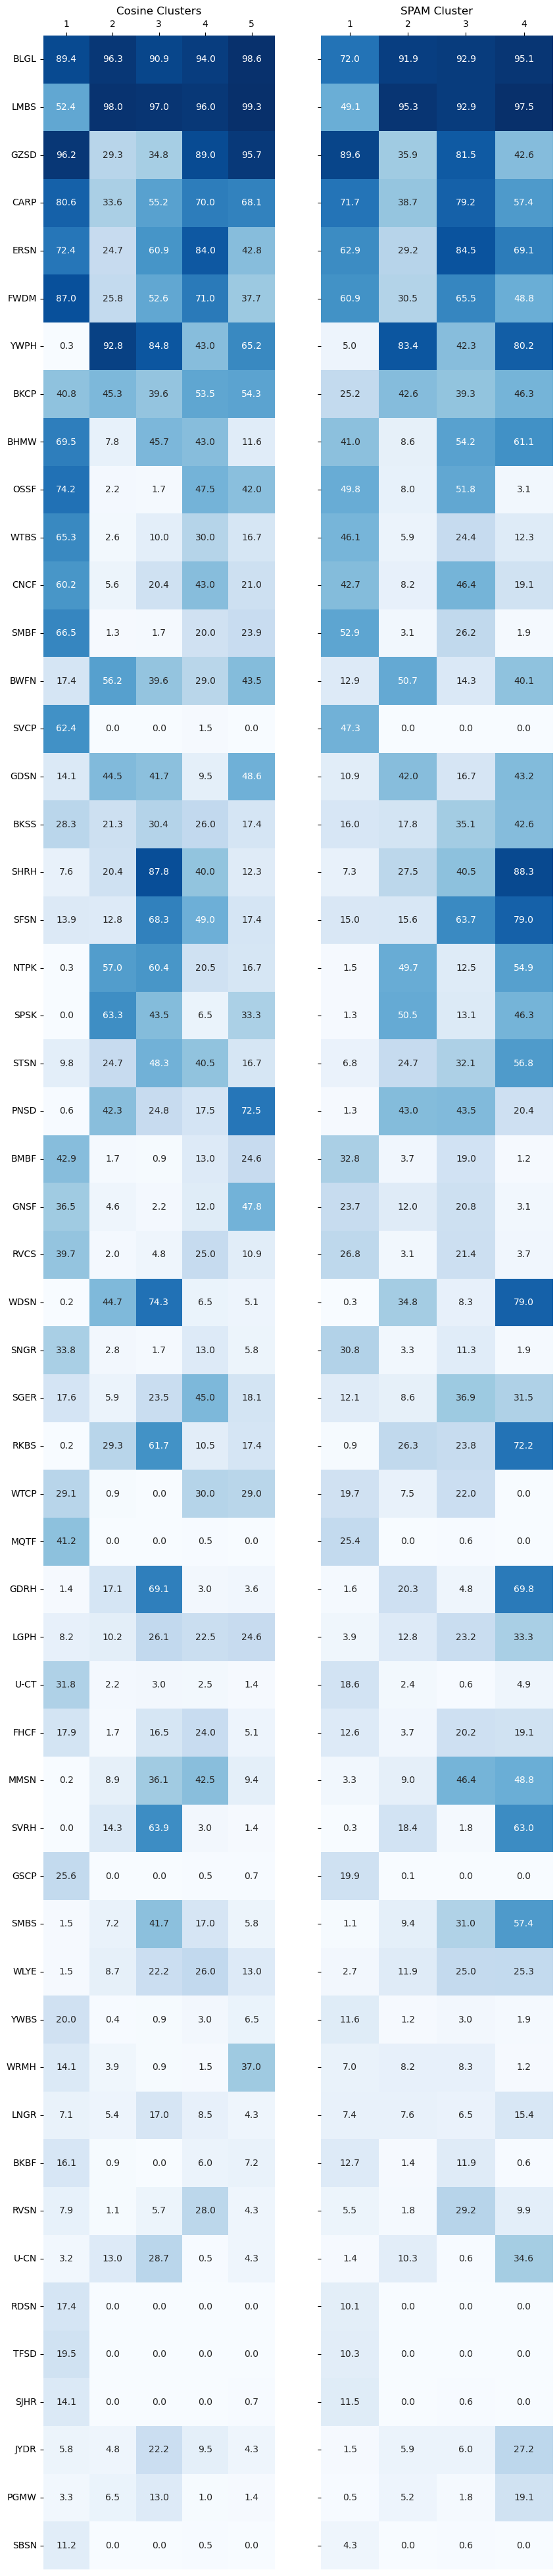

In [13]:
ordering = fish_df.mean().sort_values(ascending=False).index.tolist()
ordering.append('cluster')

cosine_comp  = fish_cosine_df[ordering].groupby('cluster').mean() * 100
spam_comp  = fish_spam_df[ordering].groupby('cluster').mean() * 100

filt = (np.maximum(cosine_comp.max(), spam_comp.max()) > 10).values

cosine_comp = cosine_comp.loc[:, filt]
spam_comp = spam_comp.loc[:, filt]

fig, ax = plt.subplots(1, 2, figsize=(10, 50), sharey=True)
sns.heatmap(cosine_comp.T, cmap='Blues', annot=True, fmt=".1f", ax = ax[0], cbar=False)
sns.heatmap(spam_comp.T, cmap='Blues', annot=True, fmt=".1f", ax = ax[1], cbar=False)
ax[0].tick_params(axis='y', rotation=0)
ax[0].set_title("Cosine Clusters")
ax[1].set_title("SPAM Cluster")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top');

In [14]:
cosine_df[['median_substrt', 'median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present', 'cluster']].to_csv("cosine_data.csv")

In [15]:
spam_df[['median_substrt', 'median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present', 'cluster']].to_csv("spam_data.csv")